Используется набор [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), CSV-файл взят [отсюда](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

Набор данных не очень хорошо подходит для задачи регрессии, т. к. целевая переменная является все же качественной.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.options.display.max_columns = None

In [3]:
def compute_quality_metrics(y_true, y_pred):
    r2_reg_score = r2_score(y_test, y_pred)
    rmse_reg_score = mean_squared_error(y_test, y_pred, squared=False)
    print("R2 = %(r2_reg_score)0.4f; RMSE = %(rmse_reg_score)0.4f" % {
        "r2_reg_score": r2_reg_score,
        "rmse_reg_score": rmse_reg_score
    })
    return r2_reg_score, rmse_reg_score

In [4]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
y = data['quality'].copy()
X = data.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

R2 = 0.3594; RMSE = 0.6513


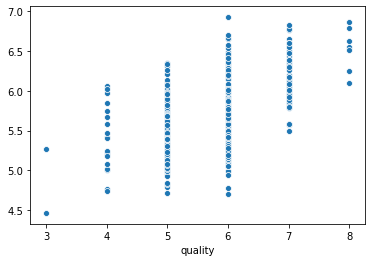

In [7]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
compute_quality_metrics(y_test, y_pred)
sns.scatterplot(y_test, y_pred)

R2 = 0.3379; RMSE = 0.6622


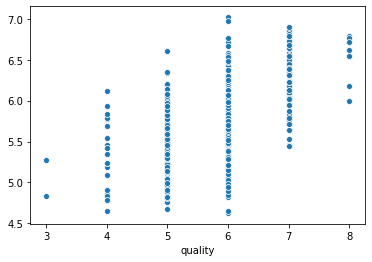

In [8]:
reg = SVR(kernel='rbf', C=175.0, epsilon=0.05)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
compute_quality_metrics(y_test, y_pred)
sns.scatterplot(y_test, y_pred)